# Exploratory Data Analysis - Retail

- Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
- As a business manager, try to find out the weak areas where you can work to make more profit.
- What all business problems you can derive by exploring the data?
- I used Python to perform EDA on this dataset.
- Dataset: https://bit.ly/3i4rbWl

                                                                                      

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("SampleSuperstore.csv")

In [4]:
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df=df.drop(['Postal Code'], axis=1)

In [6]:
df.shape

(9994, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [34]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9944.000000,9944.000000,9944.000000,9944.000000
mean,230.752150,3.794047,0.156440,28.770873
std,624.644765,2.228752,0.206584,234.841370
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.340000,2.000000,0.000000,1.724800
50%,55.000000,3.000000,0.200000,8.679950
75%,210.104000,5.000000,0.200000,29.534700
max,22638.480000,14.000000,0.800000,8399.976000


In [9]:
#Check duplicate values
df.duplicated().sum()
#Deleting duplicate values
df= df.drop_duplicates()
df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Number of unique values in each column

In [10]:
for i in df.columns:
    print(i,len(df[i].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


### Check for null values 

In [11]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Data Visualization

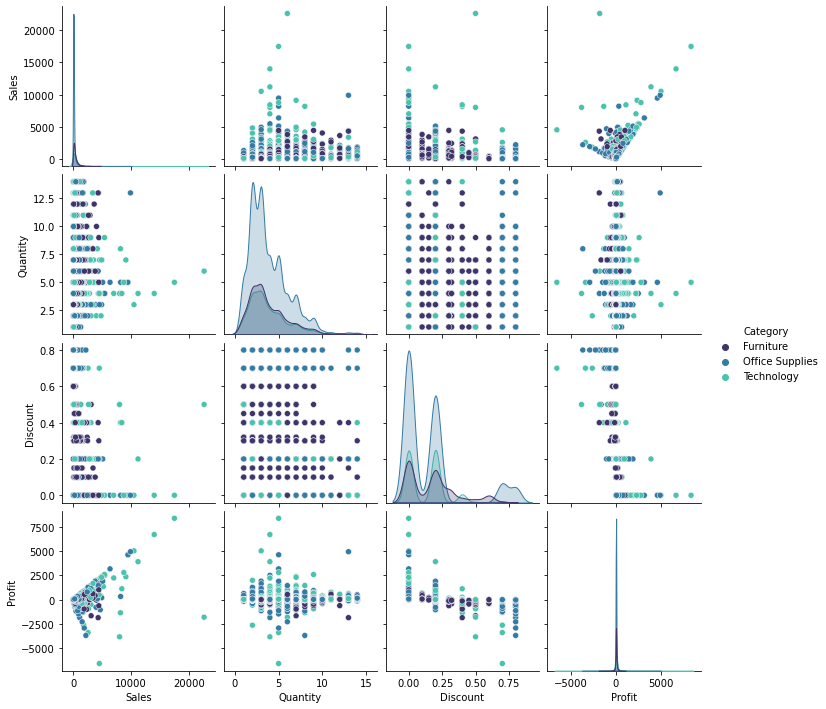

In [12]:
sns.pairplot(df, hue="Category", diag_kind="kde",palette="mako")

<AxesSubplot:>

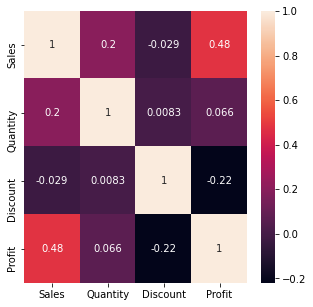

In [13]:
cor=df.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(cor, annot=True)

<AxesSubplot:xlabel='Category'>

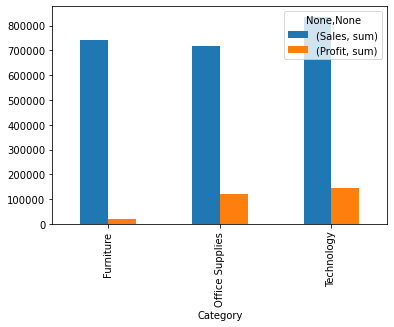

In [14]:
#Plotting the overall profit and overall sales of different categories of items
df.groupby("Category")['Sales','Profit'].agg(['sum']).plot.bar()

Text(0.5, 1.0, 'Top Category Sales vc Profit')

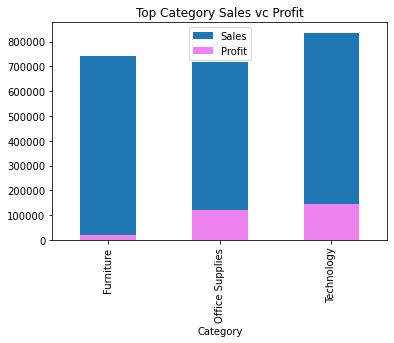

In [15]:
#Calculating the top selling category of items
transform_s = df.groupby("Category").Sales.sum()
#Calculating the top profit category of items
transform_p = df.groupby("Category").Profit.sum()

#Visualizing to understand it concisely
transform_s.plot(kind= "bar", fontsize=10, legend=True)
transform_p.plot(kind= "bar", fontsize=10, color='violet',legend=True)
plt.title("Top Category Sales vc Profit")

Text(0.5, 1.0, 'Top Category Sales vc Profit')

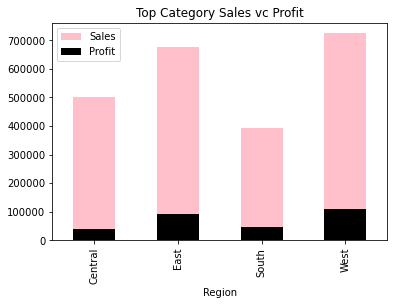

In [16]:
#Calculating the top selling category of items
transform_s = df.groupby("Region").Sales.sum()
#Calculating the top profit category of items
transform_p = df.groupby("Region").Profit.sum()

#Visualizing to understand it concisely
transform_s.plot(kind= "bar", fontsize=10, color='pink', legend=True)
transform_p.plot(kind= "bar", fontsize=10, color='black',legend=True)
plt.title("Top Category Sales vc Profit")

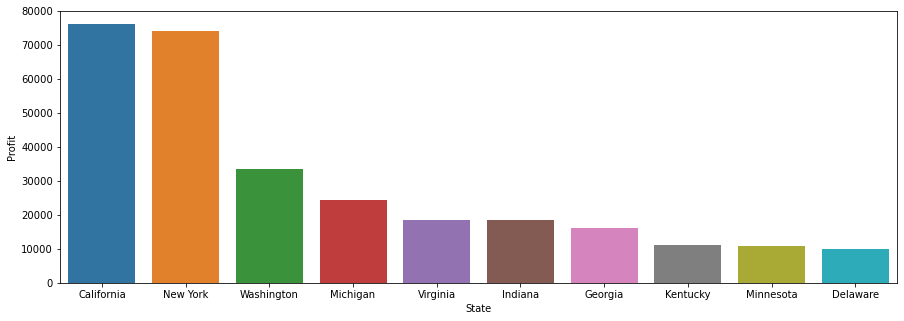

In [21]:
Top_state=df.groupby('State').sum().reset_index().sort_values('Profit',ascending=False)
Top10_States=Top_state[:10].loc[:,('State','Profit')]
plt.figure(figsize=(15,5))
sns.barplot(data=Top10_States,x="State",y="Profit")
plt.show()


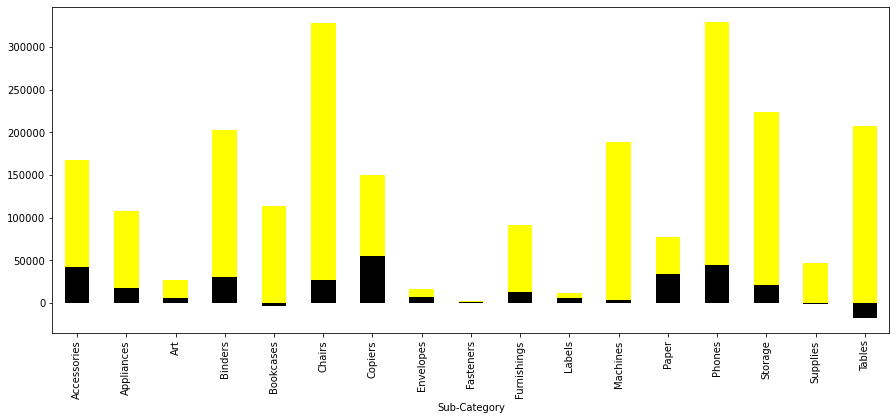

In [23]:
#Calculating the sales made in product Subcategory
transform_s = df.groupby("Sub-Category").Sales.sum()

transform_p = df.groupby("Sub-Category").Profit.sum()

#Visualizing to understand it concisely
plt.subplots(figsize=(15,6))
transform_s.plot( kind ="bar", color ="yellow", fontsize=10)
transform_p.plot( kind ="bar", color ="black", fontsize=10)
plt.show()

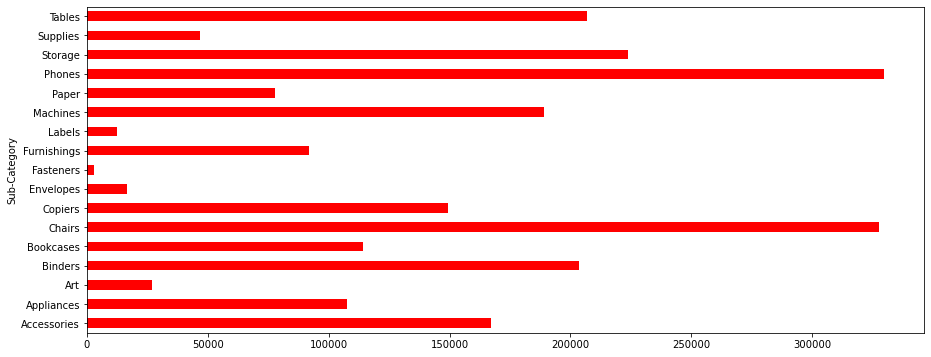

In [26]:
#plotting the profit made in product subcategory horizontally
plt.subplots(figsize=(15,6))
transform_s.plot(kind="barh", fontsize=10, color="red")
plt.show()

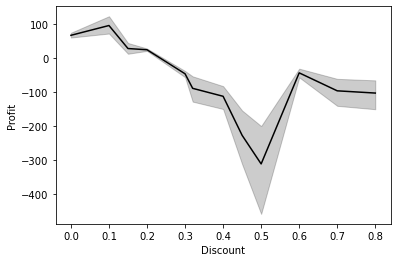

In [28]:
#plotting the discount and profit
sns.lineplot(data=df, x='Discount',y="Profit", color="black")
plt.show()

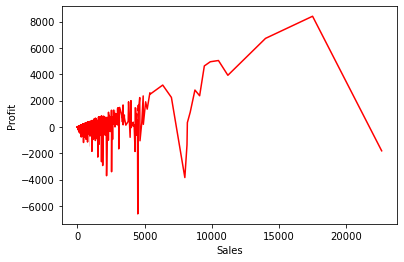

In [29]:
#plotting the sale and profit
sns.lineplot(data=df, x='Sales',y="Profit", color="red")
plt.show()

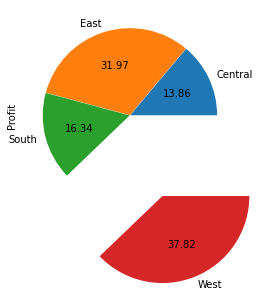

In [30]:
#Visualizing the share of profit different regions using pie charts
df.groupby("Region").sum().plot(kind="pie",y="Profit", autopct="%1.02f", explode=(0.0025,0.0025,0.0025,1),legend=False)
plt.show()